In [34]:
"""
Landon Buell
30 December 2019
"""

import numpy as np
import matplotlib.pyplot as plt
import os
import scipy.signal as signal
import scipy.io.wavfile as sciowav

int_dir = 'C:/Users/Landon/Documents/GitHub/Buell-Senior-Thesis/Notebooks'
wav_dir = 'C:/Users/Landon/Documents/wav_audio/Flutes/AltoFlute.vib.ff.stereo'
filename = 'AltoFlute.vib.ff.A4.stereo.wav'
rate = 44100

In [35]:
        #### LOAD .WAV FILE ####

os.chdir(wav_dir)
rate,data = sciowav.read(filename)

data = np.transpose(data)               # transpose
L = data[0]/np.max(np.abs(data[0]))     # norm. L waveform
R = data[1]/np.max(np.abs(data[1]))     # norm. R waveform


In [36]:
        #### AMPLITUDE ENVELOPE ####
    
analytic = signal.hilbert(L)
amp_env = np.abs(analytic)

L_snip = L[10000:15000]
env_snip = amp_env[10000:15000]

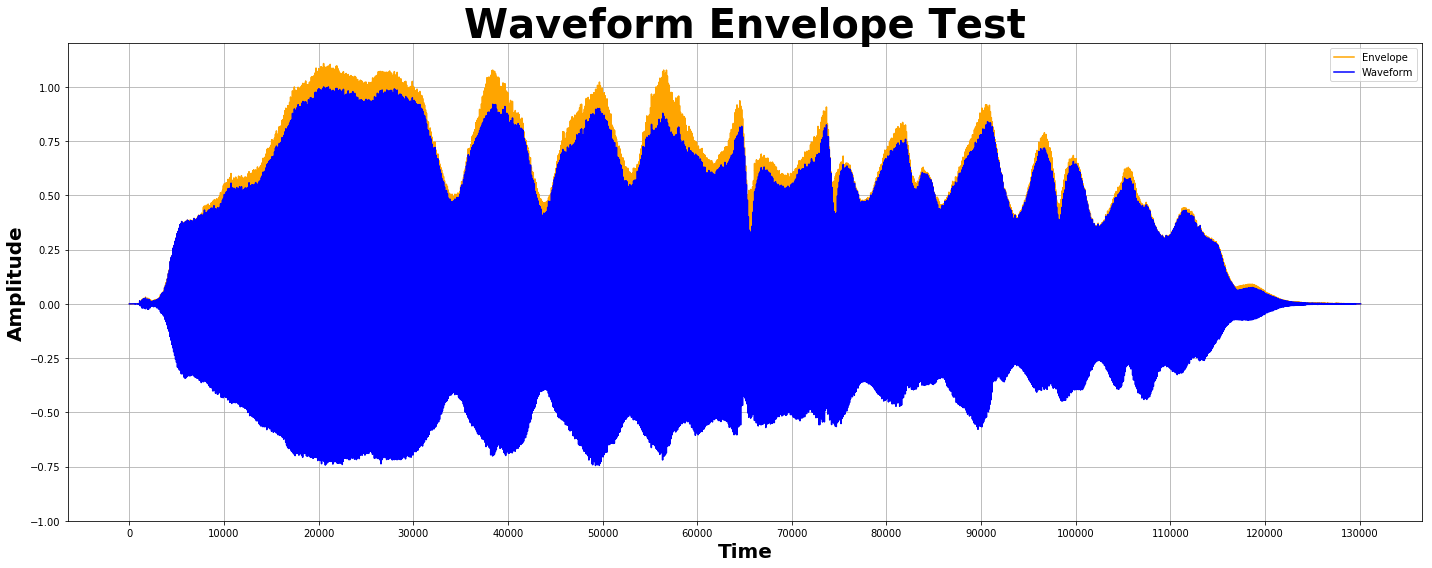

In [37]:
        #### PLOTTING ####

plt.figure(figsize=(20,8))
plt.title("Waveform Envelope Test",size=40,weight='bold')
plt.xlabel("Time",size=20,weight='bold')
plt.ylabel("Amplitude",size=20,weight='bold')

time = np.arange(0,len(L))
plt.plot(time,amp_env,color='orange',label='Envelope')
plt.plot(time,L,color='blue',label='Waveform')

#time = np.arange(10000,15000)
#plt.plot(time,env_snip,color='orange',label='Envelope')
#plt.plot(time,L_snip,color='blue',label='Waveform')

plt.xticks(np.arange(0,len(time),int(1e4)))
plt.yticks([-1.00,-0.75,-0.50,-0.25,0.00,+0.25,+0.50,+0.75,+1.00])
#plt.hlines(0,0,len(time))

plt.grid()
plt.legend()
plt.tight_layout()

plt.show()


In [40]:
        #### PHASE & FREQUENCY ####
    
inst_phase = np.unwrap(np.angle(analytic))
inst_freq = np.diff(inst_phase)/(2*np.pi/rate)

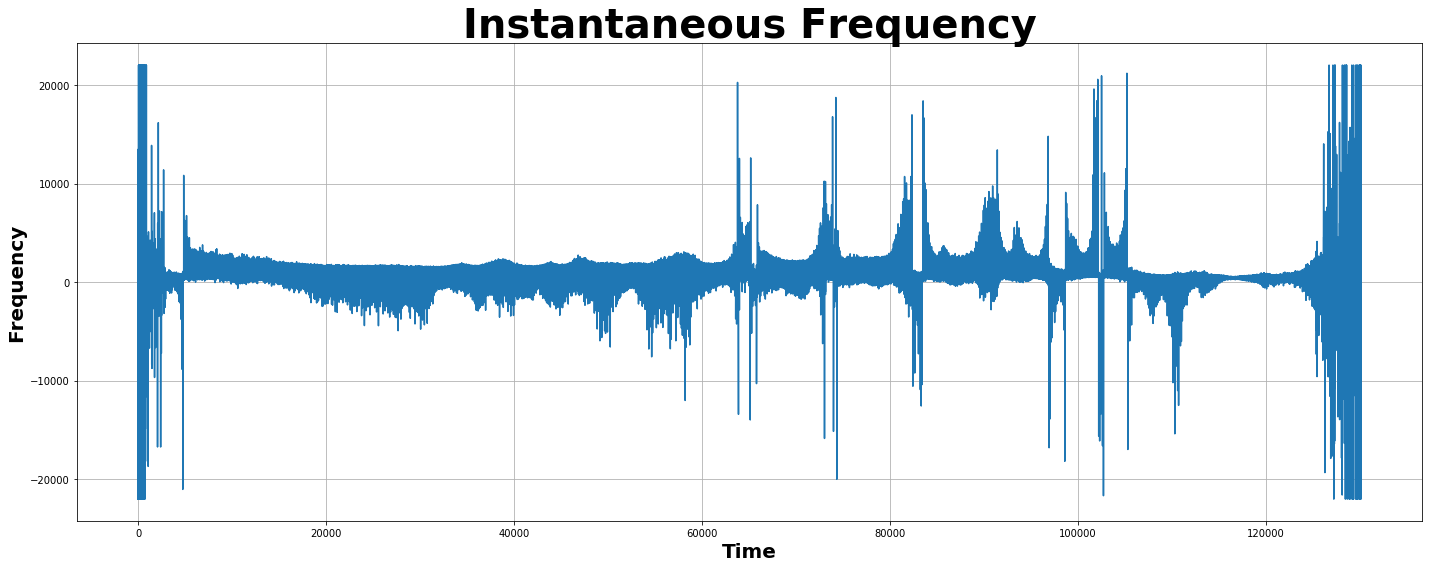

In [44]:
        #### PLOTTING ####

plt.figure(figsize=(20,8))
plt.title("Instantaneous Frequency",size=40,weight='bold')
plt.xlabel("Time",size=20,weight='bold')
plt.ylabel("Frequency",size=20,weight='bold')

time = np.arange(0,len(L)-1)
plt.plot(time,inst_freq)

#plt.xticks(np.arange(0,len(time),int(1e4)))
#plt.hlines(0,0,len(time))

plt.grid()
plt.tight_layout()

plt.show()